__Author: Martin Ng__    
__Date: 20/12/20__

Purpose of this notebook is to explore the raw loan data set in order to indentify which features are of interest or importance.


In [2]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import pandas_profiling for quick data EDA
from pandas_profiling import ProfileReport

# Load Data

In [2]:
# load loans dataset
loan_df = pd.read_csv("../../Data/Raw/LoanData.csv")

C:\Users\marti\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (34,38,80,82,83,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Possible data type issues in the columns 34,38,80,82,83,89,90. We will have to check if these variables are relevant/important for our analysis, given our contextual constraints before exploring what are the possible data types encountered in these variables. Thereafter, we would recast these variables to the appropriate data types.

# Basic Data Exploration

In [3]:
# check shape
loan_df.shape

(158309, 112)

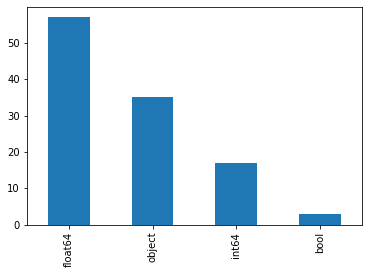

In [4]:
# check number of dtypes
loan_df.dtypes.value_counts()
loan_df.dtypes.value_counts().plot(kind='bar')
plt.show()

## Data Type Casting

In [5]:
# display head rows

# set_option to display multiple rows
pd.set_option("display.max_rows", None)

# set view as df.head().T. Transposed to allow for better readability
view = loan_df.head().T

# insert dtype column in view
view.insert(0,"dtype", loan_df.dtypes)

view

,dtype,0,1,2,3,4
ReportAsOfEOD,object,13/01/2021,13/01/2021,13/01/2021,13/01/2021,13/01/2021
LoanId,object,66AE108B-532B-4BB3-BAB7-0019A46412C1,D152382E-A50D-46ED-8FF2-0053E0C86A70,2DDE6336-E466-4624-A337-00A0ED1A1468,BA1FC89D-44B5-4481-9FCD-00C4BBC174B0,932B0F92-8B44-499F-A056-00C6D6D1E312
LoanNumber,int64,483449,378148,443082,430905,473276
ListedOnUTC,object,23/03/2016 16:07,25/06/2015 11:02,17/12/2015 10:12,13/11/2015 14:08,29/02/2016 14:24
BiddingStartedOn,object,23/03/2016 16:07,25/06/2015 11:02,17/12/2015 10:12,13/11/2015 14:08,29/02/2016 14:24
BidsPortfolioManager,int64,970,1295,305,600,635
BidsApi,int64,1150,0,0,0,0
BidsManual,float64,5,1705,785,175,0
UserName,object,BO965519,BOA9K172A,BOK423A63,BO494251A,BO1AA9K23
NewCreditCustomer,bool,False,False,True,True,True


Here we see that there are a number of columns which hold wrong data types. These are mostly the columns related to datetime which are being labelled as objects. E.g. `ReportAsOfEOD`, `ListedOnUTC`, `LoanApplicationStartedDate`, and those wrongly labelled as float64, e.g. `DateOfBirth`, `County`, `City`, etc. 

In [4]:
# date variables
date_var = ["ReportAsOfEOD", "ListedOnUTC", "BiddingStartedOn", "LoanApplicationStartedDate", "LoanDate", "ContractEndDate",
         "FirstPaymentDate", "MaturityDate_Original", "MaturityDate_Last", "DateOfBirth", "LastPaymentOn", "DebtOccuredOn",
         "DebtOccuredOnForSecondary", "DefaultDate", "StageActiveSince", "GracePeriodStart", "GracePeriodEnd","NextPaymentDate",
         "ReScheduledOn"]

# Wrongly labelled data and their appropriate data types
wrong_type_var = {
    "LoanNumber": object,
    "VerificationType": "Int64",
    "Gender": "Int64",
    "County": object,
    "City" : object,
    "Education": "Int64",
    "MaritalStatus": "Int64",
    "EmploymentStatus": "Int64",
    "EmploymentPosition": object,
    "OccupationArea": "Int64",
    "HomeOwnershipType": "Int64",
    "CurrentDebtDaysPrimary": "Int64",
    "CurrentDebtDaysSecondary": "Int64",
    "RecoveryStage": "Int64",
    "ModelVersion": "Int64",
    "CreditScoreEeMini": "Int64",
    "NextPaymentNr": "Int64",
    "NrOfScheduledPayments": "Int64"   
}

__We will cast these to the appropriate types after the initial round of feature selection.__

As per warning during data import, there are also some columns which contain mixed type values as below:

In [7]:
# list of columns suspected to be of mixed type
mixed_col = [34,38,80,82,83,89,90]

view.iloc[mixed_col,:]

,dtype,0,1,2,3,4
NrOfDependants,object,0,0,2,0,0
WorkExperience,object,15To25Years,MoreThan25Years,5To10Years,10To15Years,2To5Years
Rating_V0,object,NaN,NaN,NaN,NaN,NaN
Rating_V1,object,NaN,B,NaN,HR,NaN
Rating_V2,object,C,B,HR,HR,F
CreditScoreEsEquifaxRisk,object,NaN,NaN,C,C,NaN
CreditScoreFiAsiakasTietoRiskGrade,object,NaN,NaN,NaN,NaN,NaN


Its not obvious what the mixed data types are based on the top few rows. We shall look at the tail rows and the unique values for each column

In [8]:
# create tailview
tail_view = loan_df.tail().T

# insert dtype column in view
tail_view.insert(0,"dtype", loan_df.dtypes)

# tailview of mixed cols
tail_view.iloc[mixed_col, :]

,dtype,158304,158305,158306,158307,158308
NrOfDependants,object,2,1,0,0,0
WorkExperience,object,MoreThan25Years,5To10Years,2To5Years,MoreThan25Years,15To25Years
Rating_V0,object,NaN,NaN,NaN,NaN,NaN
Rating_V1,object,C,C,E,B,A
Rating_V2,object,C,A,C,F,AA
CreditScoreEsEquifaxRisk,object,NaN,NaN,NaN,NaN,NaN
CreditScoreFiAsiakasTietoRiskGrade,object,NaN,NaN,NaN,RL1,NaN


In [9]:
# unique values for each mixed_col
for col in mixed_col:
    print(loan_df.iloc[:,col].value_counts(dropna=False), "\n")

NaN       122709
0          10866
0.0         9179
1           4272
1.0         4068
2           2515
2.0         2515
3.0          823
3            774
4.0          224
4            198
5.0           64
5             54
6             13
6.0           10
7              8
7.0            7
10Plus         6
8.0            2
10             1
10.0           1
Name: NrOfDependants, dtype: int64 

NaN                121787
15To25Years          7902
5To10Years           7834
10To15Years          6900
MoreThan25Years      6675
2To5Years            5122
LessThan2Years       2089
Name: WorkExperience, dtype: int64 

NaN    153740
HR       1224
D         793
C         668
B         552
E         440
F         438
A         344
AA        110
Name: Rating_V0, dtype: int64 

NaN    145387
HR       3011
D        2365
C        2360
E        1899
B        1276
F        1193
A         590
AA        228
Name: Rating_V1, dtype: int64 

NaN    133166
HR       7996
C        3544
D        3454
E        3204
F

Indeed, as suggested by Pandas, these should be casted to String objects as they hold mixed value types.

In [6]:
str_var = {
    "NrOfDependants": object,
    "WorkExperience": object,
    "Rating_V0": object,
    "Rating_V1": object,
    "Rating_V2": object,
    "CreditScoreEsEquifaxRisk": object,
    "CreditScoreFiAsiakasTietoRiskGrade": object
}

We should reimport the dataset, with the variables casted in the appropriate datatypes.

In [7]:
# combine str_var into wrong_type_var
wrong_type_var.update(str_var)

In [12]:
# import loandata.csv, parse dates with date_var, and dtypes with the str_var and wrong_type_var dictionaries
loan_df = pd.read_csv("../../Data/Raw/LoanData.csv", parse_dates=date_var, dtype=wrong_type_var)

In [13]:
# read the imported data again
view = loan_df.head().T

# insert dtype column in view
view.insert(0,"dtype", loan_df.dtypes)

view

,dtype,0,1,2,3,4
ReportAsOfEOD,datetime64[ns],2021-01-13 00:00:00,2021-01-13 00:00:00,2021-01-13 00:00:00,2021-01-13 00:00:00,2021-01-13 00:00:00
LoanId,object,66AE108B-532B-4BB3-BAB7-0019A46412C1,D152382E-A50D-46ED-8FF2-0053E0C86A70,2DDE6336-E466-4624-A337-00A0ED1A1468,BA1FC89D-44B5-4481-9FCD-00C4BBC174B0,932B0F92-8B44-499F-A056-00C6D6D1E312
LoanNumber,object,483449,378148,443082,430905,473276
ListedOnUTC,datetime64[ns],2016-03-23 16:07:00,2015-06-25 11:02:00,2015-12-17 10:12:00,2015-11-13 14:08:00,2016-02-29 14:24:00
BiddingStartedOn,datetime64[ns],2016-03-23 16:07:00,2015-06-25 11:02:00,2015-12-17 10:12:00,2015-11-13 14:08:00,2016-02-29 14:24:00
BidsPortfolioManager,int64,970,1295,305,600,635
BidsApi,int64,1150,0,0,0,0
BidsManual,float64,5,1705,785,175,0
UserName,object,BO965519,BOA9K172A,BOK423A63,BO494251A,BO1AA9K23
NewCreditCustomer,bool,False,False,True,True,True


Data type seems good now.

__The next step is to perform a round of EDA, initial feature selection to disregard some features which are irrelevant to the context__

## Initial Feature Selection

For the initial round of feature selection, we will go through the feature description and consider whether to keep the features based on whether the data field will be available at the Point of loan Application (POA), and/or if the feature is useful for subsetting the data according to our contextual constraints. The features will primarily be assessed through its description and value examples at this stage.

### First Group - Feature 0:37

|Feature|To keep|Reasons|Data Type|Example Values|Description|
|-------|-------|-------|---------|--------------|-----------|
| ReportAsOfEOD | No | Irrelevant feature | datetime64[ns] | 2021-01-13 00:00:00 | Date of Data extraction |
| LoanId | Yes | Unique loan ID number | object | 66AE108B-532B-4BB3-BAB7-0019A46412C1 | A unique ID given to all loan applications |
| LoanNumber | No | Duplicated feature as LoanId | object | 483449 | A unique number given to all loan applications |
| ListedOnUTC | No | Irrelevant feature | datetime64[ns] | 2016-03-23 16:07:00 | Date when the loan application appeared on Primary Market |
| BiddingStartedOn | No | Irrelevant feature | datetime64[ns] | 2016-03-23 16:07:00 | nan |
| BidsPortfolioManager | No | Irrelevant feature | int64 | 970 | The amount of investment offers made by Portfolio Managers |
| BidsApi | No | Irrelevant feature | int64 | 1150 | The amount of investment offers made via Api |
| BidsManual | No | Irrelevant feature | float64 | 5.0 | The amount of investment offers made manually |
| UserName | Yes | Unique id for client | object | BO965519 | The user name generated by the system for the borrower |
| NewCreditCustomer | Yes | For further dataset subsetting | bool | False | Did the customer have prior credit history  0 Customer had at least 3 months of credit history  1 No prior credit history |
| LoanApplicationStartedDate | Yes | Important POA data, loan application attribute representing loan application date | datetime64[ns] | 2016-03-17 12:39:00 | Loan Application Datetime |
| LoanDate | Yes | Not POA data, but can be used for feature engineering | datetime64[ns] | 2016-03-23 00:00:00 | Date when the loan was issued |
| ContractEndDate | No | Not POA or an important feature | datetime64[ns] | 2020-06-26 00:00:00 | The date when the loan contract ended |
| FirstPaymentDate | No | Not POA or an important feature  | datetime64[ns] | 2016-12-05 00:00:00 | First payment date according to initial loan schedule |
| MaturityDate_Original | No | Can be derived from loan duration | datetime64[ns] | 2021-12-04 00:00:00 | Loan maturity date according to the original loan schedule |
| MaturityDate_Last | No | Not POA or an important feature, may also be indicative of default status, hence risk target leakage | datetime64[ns] | 2020-06-26 00:00:00 | Loan maturity date according to the current payment schedule |
| ApplicationSignedHour | No | Irrelevant feature | int64 | 17 | nan |
| ApplicationSignedWeekday | No | Irrelevant feature | int64 | 4 | nan |
| VerificationType | Yes | Not POA data, but can be used for feature engineering | Int64 | 4 | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified |
| LanguageCode | Yes | Important POA data, personal attribute, simulate race | int64 | 1 | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian |
| Age | Yes | Important POA data, personal attribute | int64 | 53 | The age of the borrower when signing the loan application |
| DateOfBirth | Yes | Important POA data, personal attribute | datetime64[ns] | NaT | The date of the borrower's birth |
| Gender | Yes | Important POA data, personal attribute | Int64 | 1 | 0 Male 1 Woman 2 Undefined |
| Country | Yes | Important POA data, personal attribute, simulate citizenship | object | EE | Residency of the borrower |
| AppliedAmount | Yes | Important POA data, loan application attribute | float64 | 2125.0 | The amount borrower applied for originally |
| Amount | Yes | Not POA data, but can be used for feature engineering | float64 | 2125.0 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market |
| Interest | Yes | Important POA data, loan application attribute | float64 | 20.97 | Maximum interest rate accepted in the loan application |
| LoanDuration | Yes | Important POA data, loan application attribute | int64 | 60 | Current loan duration in months |
| MonthlyPayment | Yes | Important POA data, loan application attribute | float64 | 62.05 | Estimated amount the borrower has to pay every month |
| County | Yes | Important POA data, personal attribute | object | nan | County of the borrower |
| City | Yes | Important POA data, personal attribute | object | nan | City of the borrower |
| UseOfLoan | Yes | Not POA data, but can be used for feature engineering | int64 | 2 | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012 |
| Education | Yes | Important POA data, personal attribute | Int64 | 4 | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education |
| MaritalStatus | Yes | Important POA data, personal attribute | Int64 | 2 | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow |
| NrOfDependants | Yes | Important POA data, personal attribute | object | 0 | Number of children or other dependants |
| EmploymentStatus | Yes | Important POA data, personal attribute | Int64 | 6 | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree |
| EmploymentDurationCurrentEmployer | Yes | Important POA data, personal attribute | object | MoreThan5Years | Employment time with the current employer |



In [14]:
# Features to keep
feat_col = ['LoanId','UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'NrOfDependants',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer']

### Second Group - Feature 37:75

|Feature|To keep|Reasons|Data Type|Example Values|Description|
|-------|-------|-------|---------|--------------|-----------|
| EmploymentPosition | Yes | Important POA data, personal attribute | object | nan | Employment position with the current employer |
| WorkExperience | Yes | Important POA data, personal attribute | object | 15To25Years | Borrower's overall work experience in years |
| OccupationArea | Yes | Important POA data, personal attribute | Int64 | 1 | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing |
| HomeOwnershipType | Yes | Important POA data, personal attribute | Int64 | 1 | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other |
| IncomeFromPrincipalEmployer | Yes | Important POA data, personal attribute | float64 | 0.0 | Borrower's income from its employer |
| IncomeFromPension | Yes | Can be used to construct Income Others feature | float64 | 301.0 | Borrower's income from pension |
| IncomeFromFamilyAllowance | Yes | Can be used to construct Income Others feature | float64 | 0.0 | Borrower's income from child support |
| IncomeFromSocialWelfare | Yes | Can be used to construct Income Others feature | int64 | 53 | Borrower's income from social support |
| IncomeFromLeavePay | Yes | Can be used to construct Income features | int64 | 0 | Borrower's income from paternity leave |
| IncomeFromChildSupport | Yes | Can be used to construct Income Others feature | int64 | 0 | Borrower's income from alimony payments |
| IncomeOther | Yes | Can be used to construct Income Others feature | float64 | 0.0 | Borrower's income from other sources |
| IncomeTotal | Yes | Can be used to construct Income Others feature | float64 | 354.0 | Borrower's total income |
| ExistingLiabilities | Yes | POA data that can be derived from external credit facility | int64 | 8 | Borrower's number of existing liabilities |
| LiabilitiesTotal | Yes | POA data that can be derived from external credit facility  | float64 | 485.09 | Total monthly liabilities |
| RefinanceLiabilities | No | Not POA data | int64 | 6 | The total amount of liabilities after refinancing |
| DebtToIncome | Yes | Not POA data, but can be used for further feature engineering | float64 | 26.29 | Ratio of borrower's monthly gross income that goes toward paying loans |
| FreeCash | No | Not POA data | float64 | 10.92 | Discretionary income after monthly liabilities |
| MonthlyPaymentDay | No | Not particularly useful data | int64 | 12 | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month) |
| ActiveScheduleFirstPaymentReached | No | Not particularly useful data | bool | True | Whether the first payment date has been reached according to the active schedule |
| PlannedPrincipalTillDate | No | Not POA or particularly useful data | float64 | 630.22 | According to active schedule the amount of principal the investment should have received |
| PlannedInterestTillDate |  No | Not POA or particularly useful data  | float64 | 1251.98 | According to active schedule the amount of interest the investment should have received |
| LastPaymentOn | No | Not POA or particularly useful data | datetime64[ns] | 2020-12-31 00:00:00 | The date of the current last payment received from the borrower |
| CurrentDebtDaysPrimary | No | Not POA or particularly useful data | Int64 | 364 | How long the loan has been in Principal Debt |
| DebtOccuredOn | No | Not POA or particularly useful data | datetime64[ns] | 2020-01-14 00:00:00 | The date when Principal Debt occurred |
| CurrentDebtDaysSecondary | No | Not POA or particularly useful data | Int64 | 442 | How long the loan has been in Interest Debt |
| DebtOccuredOnForSecondary | No | Not POA or particularly useful data | datetime64[ns] | 2019-10-28 00:00:00 | The date when Interest Debt occurred |
| ExpectedLoss | No | Not POA or particularly useful data | float64 | 0.0685 | Expected Loss calculated by the current Rating model |
| LossGivenDefault | No | Not POA or particularly useful data | float64 | 0.58 | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| ExpectedReturn | No | Not POA or particularly useful data | float64 | 0.141144934 | Expected Return calculated by the current Rating model |
| ProbabilityOfDefault | No | Not POA data | float64 | 0.122215942 | Probability of Default, refers to a loan’s probability of default within one year horizon. |
| DefaultDate | Yes | Not POA data, but important to use for target construction | datetime64[ns] | 2020-01-14 00:00:00 | The date when loan went into defaulted state and collection process was started |
| PrincipalOverdueBySchedule |  No | Not POA or particularly useful data  | float64 | 1168.79 | According to the current schedule, principal that is overdue |
| PlannedPrincipalPostDefault |  No | Not POA or particularly useful data  | 1251.98 | The amount of principal that was planned to be received after the default occurred |
| PlannedInterestPostDefault |  No | Not POA or particularly useful data  | 77.68 | The amount of interest that was planned to be received after the default occurred |
| EAD1 | No | Not POA data | float64 | 1251.98 | Exposure at default, outstanding principal at default |
| EAD2 | No | Not POA data | float64 | 64.07 | Exposure at default, loan amount less all payments prior to default |
| PrincipalRecovery |  No | Not POA or particularly useful data  | float64 | 83.19 | Principal recovered due to collection process from in debt loans |
| InterestRecovery | No | Not POA or particularly useful data  | float64 | 0.0 | Interest recovered due to collection process from in debt loans |

In [15]:
# Features to keep
feat_col = ['LoanId','UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'NrOfDependants',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'EmploymentPosition', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal','DebtToIncome','DefaultDate']

### Third Group - Feature 75:

|Feature|To keep|Reasons|Data Type|Example Values|Description|
|-------|-------|-------|---------|--------------|-----------|
| RecoveryStage | No | Not POA data or particulary useful | Int64 | 2 | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off |
| StageActiveSince | No | Not POA data or particulary useful | object | 27:48.5 | How long the current recovery stage has been active |
| ModelVersion | No | Not POA data or particulary useful | Int64 | 2 | The version of the Rating model used for issuing the Bondora Rating |
| Rating | No | Not POA data or particulary useful | object | C | Bondora Rating issued by the Rating model |
| EL_V0 | No | Not POA data or particulary useful | float64 | nan | Expected loss calculated by the specified version of Rating model |
| Rating_V0 | No | Not POA data or particulary useful | object | nan | Bondora Rating issued by version 0 of the Rating model |
| EL_V1 | No | Not POA data or particulary useful | float64 | nan | Expected loss calculated by the specified version of Rating model |
| Rating_V1 | No | Not POA data or particulary useful | object | nan | Bondora Rating issued by version 1 of the Rating model |
| Rating_V2 | No | Not POA data or particulary useful | object | C | Bondora Rating issued by version 2 of the Rating model |
| Status | Yes | Not POA data, but can be used for feature engineering | object | Late | The current status of the loan application |
| Restructured |  No | Not POA data or particulary useful | bool | False | The original maturity date of the loan has been increased by more than 60 days |
| ActiveLateCategory |  No | Not POA data or particulary useful  | object | 180+ | When a loan is in Principal Debt then it will be categorized by Principal Debt days |
| WorseLateCategory|  No | Not POA data or particulary useful  | object | 180+ | Displays the last longest period of days when the loan was in Principal Debt |
| CreditScoreEsMicroL | No | Not POA data or particulary useful  | object | nan | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10. |
| CreditScoreEsEquifaxRisk |  No | Not POA data or particulary useful | object | nan | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”). |
| CreditScoreFiAsiakasTietoRiskGrade | No | Not POA data or particulary useful | object | nan | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100 |
| CreditScoreEeMini | No | Not POA data or particulary useful | Int64 | 1000 | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems |
| PrincipalPaymentsMade |  No | Not POA data or particulary useful | float64 | 956.21 | Note owner received loan transfers principal amount |
| InterestAndPenaltyPaymentsMade |  No | Not POA data or particulary useful  | float64 | 1187.91 | Note owner received loan transfers earned interest, penalties total amount |
| PrincipalWriteOffs |  No | Not POA data or particulary useful  | float64 | 0.0 | Principal that was written off on the investment |
| InterestAndPenaltyWriteOffs | No | Not POA data or particulary useful | float64 | 0.0 | Interest that was written off on the investment |
| PrincipalBalance | No | Not POA data or particulary useful  | float64 | 1168.79 | Principal that still needs to be paid by the borrower |
| InterestAndPenaltyBalance |  No | Not POA data or particulary useful | float64 | 313.09 | Unpaid interest and penalties |
| NoOfPreviousLoansBeforeLoan | Yes |  Not POA data, but can be used for feature engineering| int64 | 1 | Number of previous loans |
| AmountOfPreviousLoansBeforeLoan | Yes |  Not POA data, but can be used for feature engineering | float64 | 500.0 | Value of previous loans |
| PreviousRepaymentsBeforeLoan |  Yes |  Not POA data, but can be used for feature engineering| float64 | 590.95 | How much the borrower had repaid before the loan |
| PreviousEarlyRepaymentsBefoleLoan |   Yes |  Not POA data, but can be used for feature engineering | float64 | 0.0 | nan |
| PreviousEarlyRepaymentsCountBeforeLoan |  Yes |  Not POA data, but can be used for feature engineering| int64 | 0 | How many times the borrower had repaid early |
| GracePeriodStart | No | Not POA data | datetime64[ns] | 2019-10-28 00:00:00 | Date of the beginning of Grace period |
| GracePeriodEnd | No | Not POA data  | datetime64[ns] | 2020-01-27 00:00:00 | Date of the end of Grace period |
| NextPaymentDate | No | Not POA data or particulary useful | datetime64[ns] | NaT | According to schedule the next date for borrower to make their payment |
| NextPaymentNr | No | Not POA data or particulary useful | Int64 | <NA> | According to schedule the number of the next payment |
| NrOfScheduledPayments | No | Not POA data or particulary useful | Int64 | <NA> | According to schedule the count of scheduled payments |
| ReScheduledOn | No | Not POA data or particulary useful | datetime64[ns] | NaT | The date when the a new schedule was assigned to the borrower |
| PrincipalDebtServicingCost | No | Not POA data or particulary useful | float64 | 0.0 | Service cost related to the recovery of the debt based on the principal of the investment |
| InterestAndPenaltyDebtServicingCost | No | Not POA data or particulary useful | float64 | 44.75 | Service cost related to the recovery of the debt based on the interest and penalties of the investment |
| ActiveLateLastPaymentCategory | No | Not POA data or particulary useful | object | Aug-15 | Shows how many days has passed since last payment and categorised if it is overdue |

In [10]:
# Features to keep
feat_col = ['LoanId','UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'NrOfDependants',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'EmploymentPosition', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal','DebtToIncome','DefaultDate',
       'Status',
       'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsBefoleLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan']
len(feat_col)

46

Overall we have shorten the list of features to consider to 46. With this, we can perform a quick EDA to further understand the usefulness and issues of the various columns.

In [8]:
# import loandata.csv, parse dates with date_var, and dtypes with the str_var and wrong_type_var dictionaries
loan_df = pd.read_csv("../../Data/Raw/LoanData.csv", dtype=wrong_type_var)
loan_df['LoanApplicationStartedDate'] = pd.to_datetime(loan_df['LoanApplicationStartedDate'], format='%d/%m/%Y %H:%M')
loan_df['DefaultDate'] = pd.to_datetime(loan_df['DefaultDate'], format='%d/%m/%Y')
loan_df['LoanDate'] = pd.to_datetime(loan_df['LoanDate'], format='%d/%m/%Y')

## Missingness, Cardinality, Correlation & Duplicates

In [11]:
# get subset
loan_df = loan_df[feat_col]
loan_df.shape

(158309, 46)

In [19]:
# use pandas profiling
profile = ProfileReport(loan_df)
profile.to_file("../../Docs/DataReport/rawloandataEDA.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]


__Refer to the [rawloandataEDA](../../Docs/DataReport/rawloandataEDA.html) report for quick EDA results.__

Right off the bat, we see that there are a number of issues, especially with missing values.

In [12]:
# number of missing values
loan_df[['County', 'City', 'EmploymentPosition', 'DateOfBirth']].isna().sum()

County                158309
City                  158309
EmploymentPosition    158309
DateOfBirth           158309
dtype: int64

We see that while certain features like `County`, `City`, `EmploymentPosition`, `DateOfBirth` are useful and are data available at POA, they have 100% missing values and are thus not useful for analysis. We will not use them subsequently.

Next, lets check for duplicates.

In [13]:
# update feat_col
feat_col = ['LoanId','UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'NrOfDependants',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal','DebtToIncome','DefaultDate',
       'Status', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsBefoleLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan']

In [14]:
# subset loan_df
loan_df = loan_df[feat_col]
loan_df.shape

(158309, 42)

In [15]:
# check for duplicates, using all column values
loan_df[loan_df.duplicated()]

,LoanId,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,VerificationType,LanguageCode,Age,Gender,Country,...,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,DefaultDate,Status,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan


In [16]:
# check for duplicates using LoanId and UserName which are unique identifiers
loan_df[loan_df.duplicated(subset=['LoanId', 'UserName'])]

,LoanId,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,VerificationType,LanguageCode,Age,Gender,Country,...,ExistingLiabilities,LiabilitiesTotal,DebtToIncome,DefaultDate,Status,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan


Overall, we see no duplicated rows.

In [17]:
# to fix wrong column name
loan_df.rename(columns={'PreviousEarlyRepaymentsBefoleLoan': 'PreviousEarlyRepaymentsBeforeLoan'}, inplace=True)

In [18]:
# save loan_df
loan_df.to_csv("../../Data/Processed/processedLoanData.csv", index=False)

# Initial Set of Features to Use

Based on raw loan data EDA, we have reduced the number of features which we can consider to be useful for construction of POA dataset. These include:

```python
feat_col = ['LoanId','UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'NrOfDependants',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal','DebtToIncome','DefaultDate',
       'Status', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan']

```

These lists are constructed by dropping irrelevant features, e.g. date of extraction, by studying the data dictionary, and considering the actual information required in the loan application forms (online/offline) and other pratical considerations, e.g. 100% missing values in features.

|Feature|To keep|Reasons|Data Type|Example Values|Description|
|-------|-------|-------|---------|--------------|-----------|
| LoanId | Yes | Unique loan ID number | object | 66AE108B-532B-4BB3-BAB7-0019A46412C1 | A unique ID given to all loan applications |
| UserName | Yes | Unique id for client | object | BO965519 | The user name generated by the system for the borrower |
| NewCreditCustomer | Yes | For further dataset subsetting | bool | False | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora |
| LoanApplicationStartedDate | Yes | Important POA data, loan application attribute representing loan application date | datetime64[ns] | 2016-03-17 12:39:00 | Loan Application Datetime |
| LoanDate | Yes | Not POA data, but can be used for feature engineering | datetime64[ns] | 2016-03-23 00:00:00 | Date when the loan was issued |
| VerificationType | Yes | Not POA data, but can be used for feature engineering | Int64 | 4 | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified |
| LanguageCode | Yes | Important POA data, personal attribute, simulate race | int64 | 1 | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian |
| Age | Yes | Important POA data, personal attribute | int64 | 53 | The age of the borrower when signing the loan application |
| DateOfBirth | Yes | Important POA data, personal attribute | datetime64[ns] | NaT | The date of the borrower's birth |
| Gender | Yes | Important POA data, personal attribute | Int64 | 1 | 0 Male 1 Woman 2 Undefined |
| Country | Yes | Important POA data, personal attribute, simulate citizenship | object | EE | Residency of the borrower |
| AppliedAmount | Yes | Important POA data, loan application attribute | float64 | 2125.0 | The amount borrower applied for originally |
| Amount | Yes | Not POA data, but can be used for feature engineering | float64 | 2125.0 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market |
| Interest | Yes | Important POA data, loan application attribute | float64 | 20.97 | Maximum interest rate accepted in the loan application |
| LoanDuration | Yes | Important POA data, loan application attribute | int64 | 60 | Current loan duration in months |
| MonthlyPayment | Yes | Important POA data, loan application attribute | float64 | 62.05 | Estimated amount the borrower has to pay every month |
| County | Yes | Important POA data, personal attribute | object | nan | County of the borrower |
| City | Yes | Important POA data, personal attribute | object | nan | City of the borrower |
| UseOfLoan | Yes | Not POA data, but can be used for feature engineering | int64 | 2 | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012 |
| Education | Yes | Important POA data, personal attribute | Int64 | 4 | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education |
| MaritalStatus | Yes | Important POA data, personal attribute | Int64 | 2 | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow |
| NrOfDependants | Yes | Important POA data, personal attribute | object | 0 | Number of children or other dependants |
| EmploymentStatus | Yes | Important POA data, personal attribute | Int64 | 6 | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree |
| EmploymentDurationCurrentEmployer | Yes | Important POA data, personal attribute | object | MoreThan5Years | Employment time with the current employer |
| EmploymentPosition | Yes | Important POA data, personal attribute | object | nan | Employment position with the current employer |
| WorkExperience | Yes | Important POA data, personal attribute | object | 15To25Years | Borrower's overall work experience in years |
| OccupationArea | Yes | Important POA data, personal attribute | Int64 | 1 | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing |
| HomeOwnershipType | Yes | Important POA data, personal attribute | Int64 | 1 | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other |
| IncomeFromPrincipalEmployer | Yes | Important POA data, personal attribute | float64 | 0.0 | Borrower's income from its employer |
| IncomeFromPension | Yes | Can be used to construct Income Others feature | float64 | 301.0 | Borrower's income from pension |
| IncomeFromFamilyAllowance | Yes | Can be used to construct Income Others feature | float64 | 0.0 | Borrower's income from child support |
| IncomeFromSocialWelfare | Yes | Can be used to construct Income Others feature | int64 | 53 | Borrower's income from social support |
| IncomeFromLeavePay | Yes | Can be used to construct Income features | int64 | 0 | Borrower's income from paternity leave |
| IncomeFromChildSupport | Yes | Can be used to construct Income Others feature | int64 | 0 | Borrower's income from alimony payments |
| IncomeOther | Yes | Can be used to construct Income Others feature | float64 | 0.0 | Borrower's income from other sources |
| IncomeTotal | Yes | Can be used to construct Income Others feature | float64 | 354.0 | Borrower's total income |
| ExistingLiabilities | Yes | POA data that can be derived from external credit facility | int64 | 8 | Borrower's number of existing liabilities |
| LiabilitiesTotal | Yes | POA data that can be derived from external credit facility  | float64 | 485.09 | Total monthly liabilities |
| DebtToIncome | Yes | Not POA data, but can be used for further feature engineering | float64 | 26.29 | Ratio of borrower's monthly gross income that goes toward paying loans |
| DefaultDate | Yes | Not POA data, but important to use for target construction | datetime64[ns] | 2020-01-14 00:00:00 | The date when loan went into defaulted state and collection process was started |
| Status | Yes | Not POA data, but can be used for feature engineering | object | Late | The current status of the loan application |
| NoOfPreviousLoansBeforeLoan | Yes |  Not POA data, but can be used for feature engineering| int64 | 1 | Number of previous loans |
| AmountOfPreviousLoansBeforeLoan | Yes |  Not POA data, but can be used for feature engineering | float64 | 500.0 | Value of previous loans |
| PreviousRepaymentsBeforeLoan |  Yes |  Not POA data, but can be used for feature engineering| float64 | 590.95 | How much the borrower had repaid before the loan |
| PreviousEarlyRepaymentsBefoleLoan |   Yes |  Not POA data, but can be used for feature engineering | float64 | 0.0 | nan |
| PreviousEarlyRepaymentsCountBeforeLoan |  Yes |  Not POA data, but can be used for feature engineering| int64 | 0 | How many times the borrower had repaid early |

# Code for data type parsing

1. Code for importing the raw LoanData.csv with the right data types casted

```python
# Wrongly labelled data and their appropriate data types
wrong_type_var = {
     'LoanId': object,
     'VerificationType': 'Int64',
     'Gender': 'Int64',
     'Education': 'Int64',
     'MaritalStatus': 'Int64',
     'EmploymentStatus': 'Int64',
     'OccupationArea': 'Int64',
     'HomeOwnershipType': 'Int64',
     'NrOfDependants': object,
     'WorkExperience': object}

loan_df = pd.read_csv("../../Data/Processed/processedLoanData.csv", dtype=wrong_type_var)

loan_df['LoanApplicationStartedDate'] = pd.to_datetime(loan_df['LoanApplicationStartedDate'], format='%d/%m/%Y %H:%M')
loan_df['DefaultDate'] = pd.to_datetime(loan_df['DefaultDate'], format='%d/%m/%Y')
loan_df['LoanDate'] = pd.to_datetime(loan_df['LoanDate'], format='%d/%m/%Y')


```